# Variables aleatorias (abolutamente) continuas

$$ F_X(x) = \mathbb{P}(X\leq x) = \int_{-\infty}^{x}f_X  dt $$

existe $f_X(x)$ que es la función de densidad, tal que, al integrarla se convierte en una variable continua.

Podems encontrar $f_X$ de $X$, como sigue:
$$ \frac{dF_X(x)}{dx} = f_X(x) $$

In [4]:
import numpy as np # Importamos Numpy
import numpy.random as npr # para generar numeros aleatorios

import scipy.stats as sps # Importamos el modulo SciPy
from scipy.stats import randint # para trabajar una uniforme discreta en un rango de enteros

import matplotlib.pyplot as plt #Visualizar datos 

import random # para generar numeros aleatorios

## Variable aleatoria uniforme sobre el intervalo $(a,b)$.

Una variable aleatoria $X$ se dice que tiene distribución uniforme continua  en el intervalo $(a,b)$ con $a,b\in\mathbb{R}$, si su función de densidad esta dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{b-a} &\quad \text{si } a< x < b\\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

**Notación.** $X\sim \text{Unif}(a,b)$ $\text{Unif}[a,b]$

**Obs:**
* La distribución uniforme continua en $(a,b)$ es simétrica.
* A los intervalos de la misma longitud contenidos en $(a,b)$ se les asigna la misma probabilidad. Esto se representa gráficamente con la probabilidad de que $X$ se encuentre en el intervalo $(s,t)$:


La función de distribución de $X\sim Unif((a,b))$ esta dada por:
$$F_{X}(x)=\begin{cases}
	 0 &\quad \text{si } x\le a \\
	\frac{x-a}{b-a} &\quad \text{si } a<x<b\\
	 1 &\quad \text{si } x\ge b  
\end{cases}$$

La esperanza de una variable aleatoria uniforme es la siguiente,
$$\begin{align*}
\mathbb{E}[X] &= \int_{a}^{b}xf_{X}(x)dx = \int_{a}^{b}x\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}xdx  = \frac{1}{b-a}\left[\frac{x^{2}}{2}\right]_{a}^{b} \\ &= \frac{1}{b-a}\left[\frac{b^{2}}{2}-\frac{a^{2}}{2}\right] =  \frac{b^{2}-a^{2}}{2(b-a)} = \frac{(b-a)(b+a)}{2(b-a)} = \frac{a+b}{2}.
\end{align*}$$

Para calcular la varianza, primero vamos a calcular el segundo momento
$$\begin{align*}
\mathbb{E}[X^{2}] &= \int_{a}^{b}x^{2}f_{X}(x)dx = \int_{a}^{b}x^{2}\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}x^{2}dx \\ &= \frac{1}{b-a}\left[\frac{x^{3}}{3}\right]_{a}^{b} = \frac{1}{b-a}\left[\frac{b^{3}}{3}-\frac{a^{3}}{3}\right] =  \frac{b^{3}-a^{3}}{3(b-a)}.
\end{align*}$$

Por lo que se tiene lo siguiente

$$Var(X) = \mathbb{E}[X^{2}]-(\mathbb{E}[X])^{2} =\frac{b^{3}-a^{3}}{3(b-a)}-\left(\frac{a+b}{2}\right)^{2} = \frac{(b-a)^{2}}{12}.$$

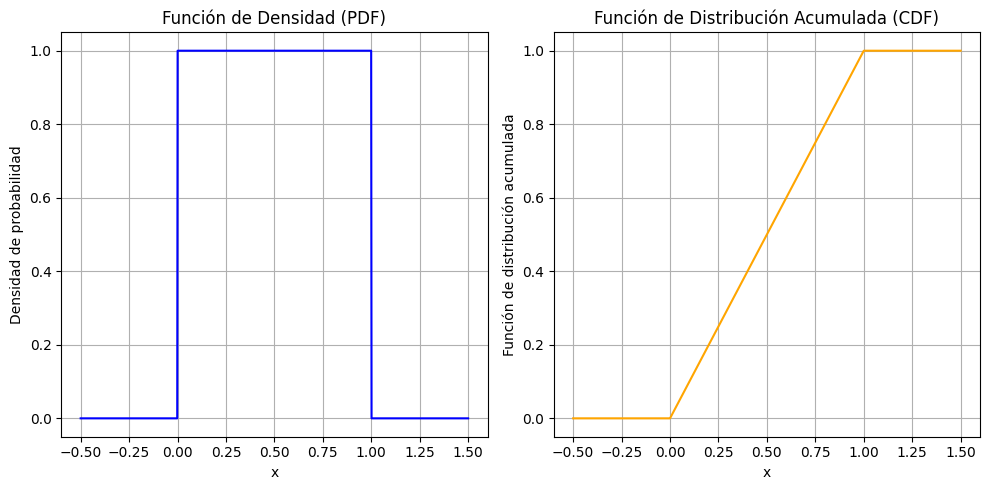

In [5]:
# Parámetros de la distribución uniforme
a = 0  # límite inferior
b = 1  # límite superior

# Definimos las funciones de densidad y distribución
# Función de densidad (pdf) de la distribución uniforme
def uniform_pdf(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

# Función de distribución (cdf) de la distribución uniforme
def uniform_cdf(x, a, b):
    return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))
    
# Generar valores de x
x = np.linspace(-0.5, 1.5, 1000)

# Calcular la función densidad 
pdf_values = uniform_pdf(x, a, b)

# Calcular la función de distribución
cdf_values = uniform_cdf(x, a, b)

# Graficar la PDF
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label='PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad (PDF)')
plt.grid(True)

# Graficar la CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='CDF', color='orange')
plt.xlabel('x')
plt.ylabel('Función de distribución acumulada')
plt.title('Función de Distribución Acumulada (CDF)')
plt.grid(True)

plt.tight_layout()
plt.show()

**Ejemplo.** 	Sea $X\sim Unif((-3,2))$. Vamos a calcular: $P(X\ge 0)$ y
$P(-5 \le X \le 1/2)$.
**Solución.** La función de densidad de esta variable aleatoria esta dada por:
$$f_{X}(x)=\begin{cases}
	\quad \frac{1}{5} &\quad \text{si } -3\le x \le 2\\
	\quad 0 &\quad \text{e.o.c}  
\end{cases}$$
Entonces,

$$\begin{align}
\mathbb{P}(X\ge 0) &= \int_{0}^{2}\frac{1}{5}dx=\frac{1}{5}x\Big|_{0}^{2}=\frac{2}{5} \\
\mathbb{P}(-5 \le X \le 1/2) &= \int_{-3}^{1/2}\frac{1}{5}dx=\frac{1}{5}x\Big|_{-3}^{1/2}=\frac{1}{5}\left(\frac{1}{2}+3\right)=\frac{7}{10}
\end{align}$$

$$\mathbb{P}(X\ge 0) = 1-\mathbb{P}(X<0) = 1-F_X (0)$$

$$F_X(x):=\mathbb{P}(X\le x)$$

$$\mathbb{P}(-5 \le X \le 1/2) = F_X (1/2)-F_X(-5)$$